In [2]:
import sys
sys.path.append("../")
import os
import numpy as np
import nibabel as nb
import pandas as pd
import matplotlib.pyplot as plt
import CMR_HFpEF_Analysis.functions_collection as ff

main_path = '/mnt/camca_NAS/HFpEF/'
save_path = os.path.join(main_path, 'pictures')

ModuleNotFoundError: No module named 'CMR_HFpEF_Analysis'

# box plot for motion correction

In [6]:
# file
end2end_data = pd.read_excel(main_path + 'predict/end2end/comparison_misalignment_unit_pixel_edited.xlsx').iloc[0:4365]
twostep_data = pd.read_excel(main_path + 'predict/STN_vector_img/comparison_misalignment_unit_pixel_edited.xlsx').iloc[0:4365]


motion = end2end_data['Misalignment_motion']
twostep = twostep_data['Misalignment_pred']
end2end = end2end_data['Misalignment_pred']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


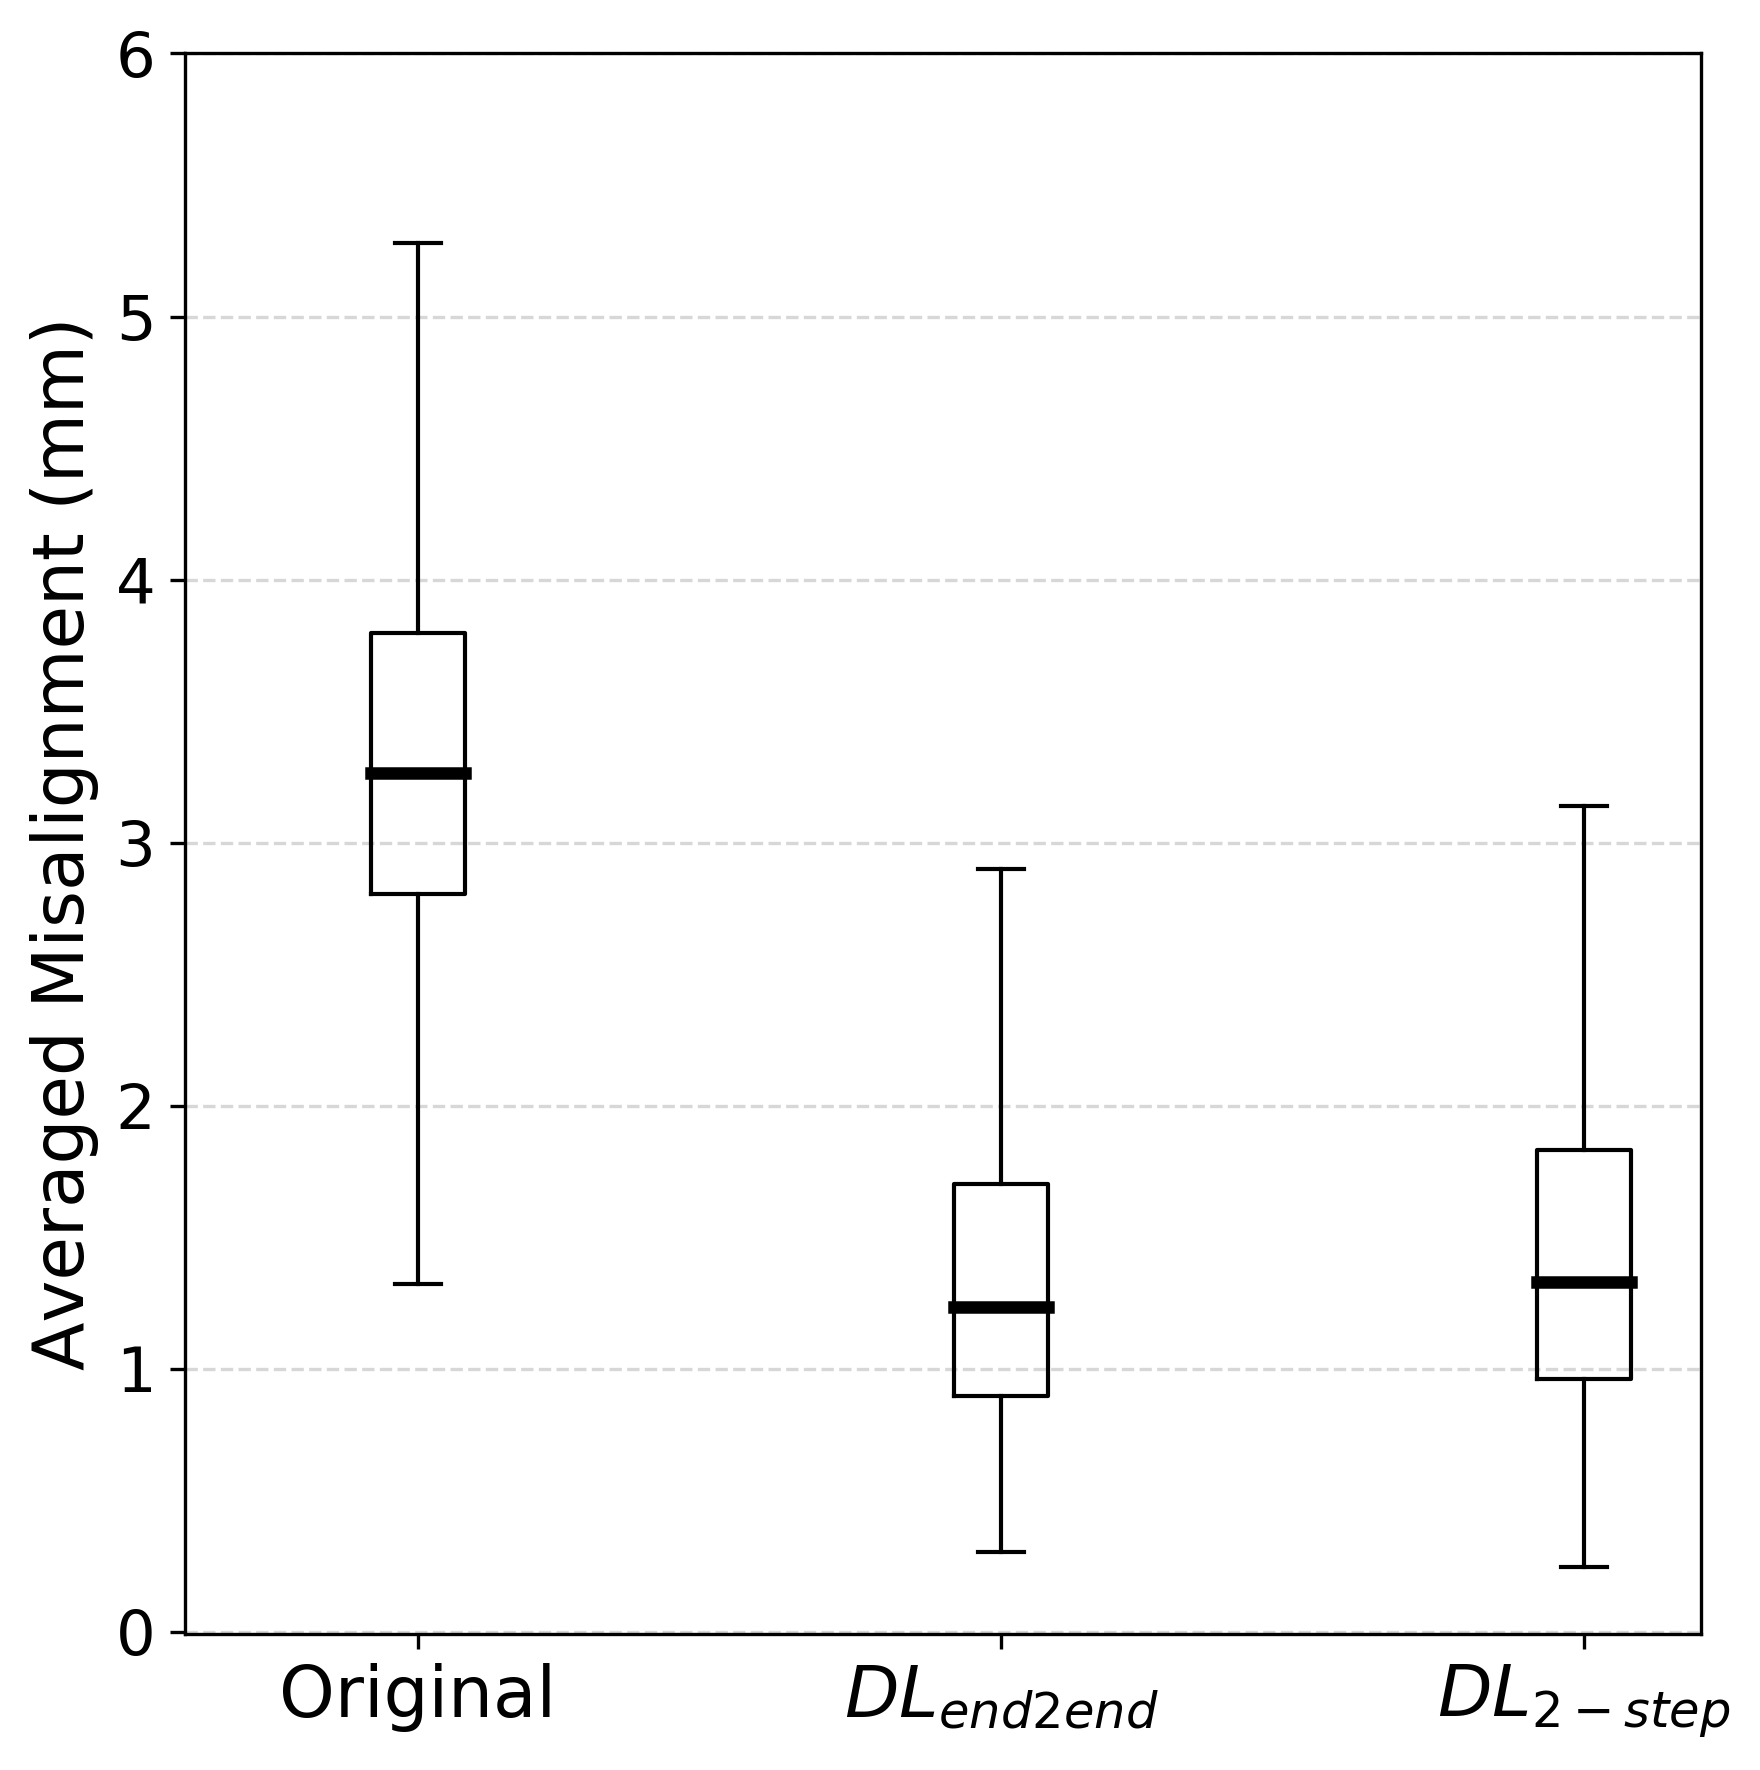

In [26]:
save_path = os.path.join(main_path,'pictures/manuscript/box_plot_motion_misalignment.eps')

# font2 is typically used for legend
data_all = [motion, end2end, twostep]

ticks = ['Original', '$DL_{end2end}$','$DL_{2-step}$']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=3)

plt.figure(figsize= (6,6), dpi = 300)

bp_all = plt.boxplot(data_all, positions=[1.0,3.5, 6.0], sym='', widths=0.4)

set_box_color(bp_all, 'black') # colors are from http://colorbrewer2.org/


plt.xticks([1.0, 3.5, 6.0], ticks,fontsize = 17)
plt.xlim(-0, 6.5)
plt.yticks(np.arange(0.,6.01,step = 1),fontsize=15)
plt.grid(True, linestyle='dashed', alpha=0.5, axis = 'y')
plt.ylabel("Averaged Misalignment (mm)",fontsize=17)
plt.tight_layout()

# save
plt.savefig(save_path, format='eps')

# Box plot for super-resolution

In [35]:
main_path = '/mnt/mount_zc_NAS/HFpEF'
motion_data = pd.read_excel(os.path.join(main_path , 'predict/EDSR_LVmyo_motion_new/comparison_img_edited.xlsx')).iloc[0:4365]
twostep_data = pd.read_excel(os.path.join(main_path , 'predict/EDSR_LVmyo_ds_new/comparison_img_edited.xlsx')).iloc[0:4365]
end2end_data = pd.read_excel(os.path.join(main_path , 'predict/end2end/comparison_img_edited.xlsx')).iloc[0:4365]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

2.072817849184107 1.9219581449073806 2.2718731757401818
2.2491556228713985 2.0661687209887294 2.7172160413582396
2.0512069708910015 1.9172939782746252 2.228774710933521
2.1193308276476746 1.9861806163481166 2.3033788578194434


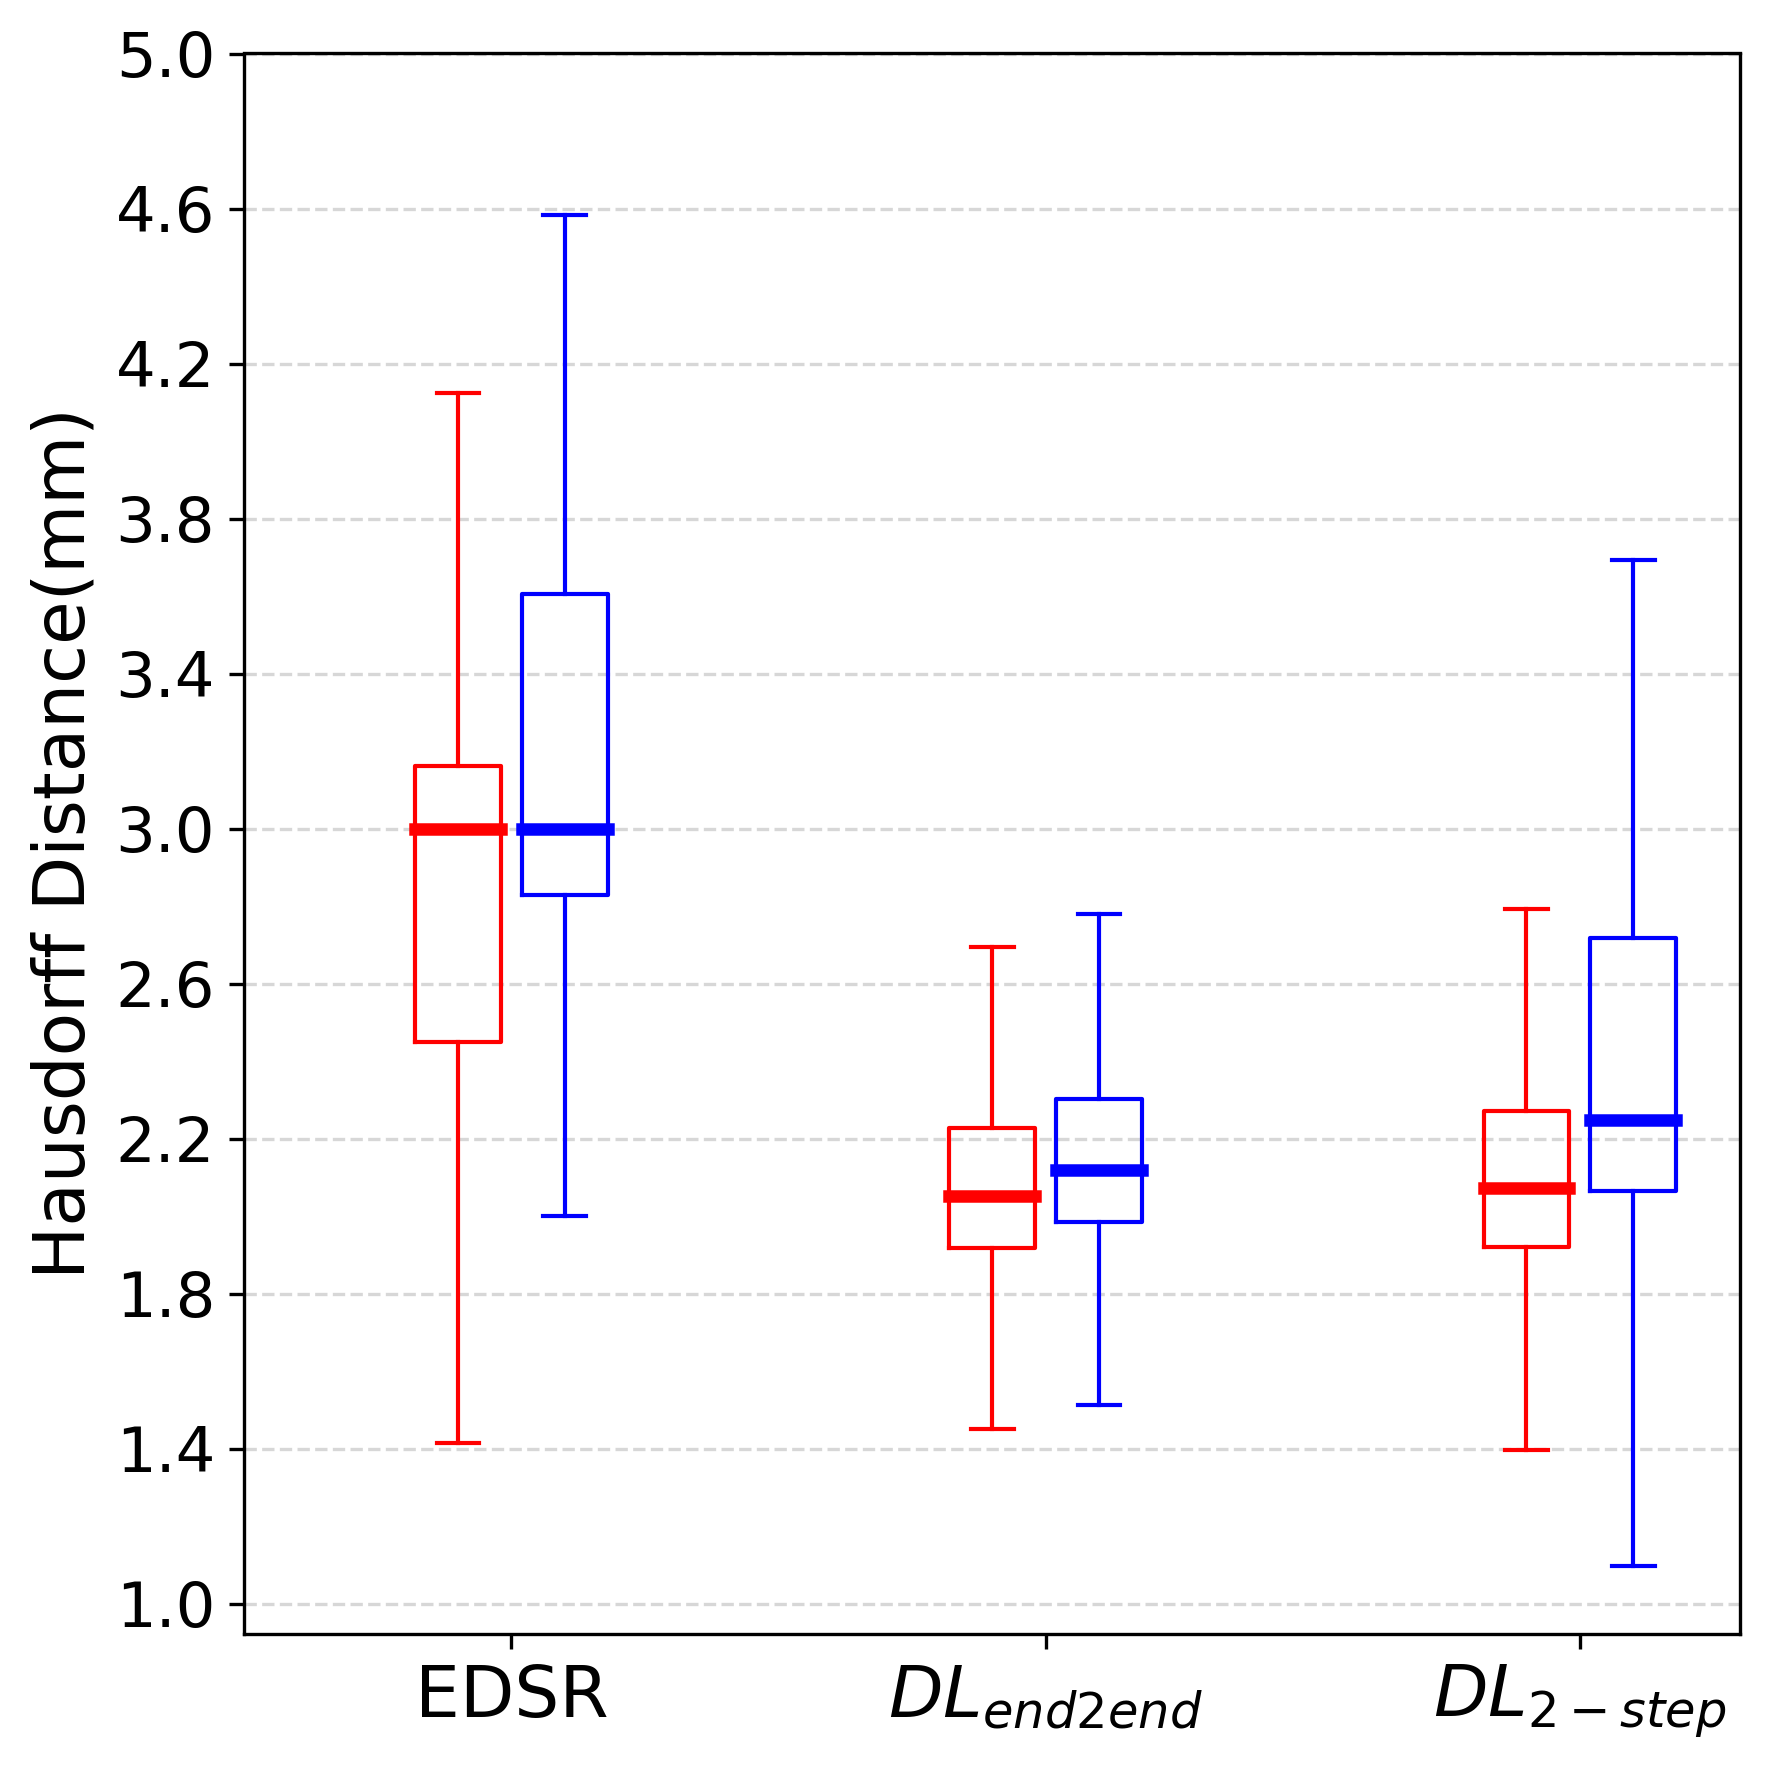

In [54]:
motion_lv = motion_data['lv_hd_one_direct'] 
motion_myo = motion_data['myo_hd_one_direct'] 
twostep_lv = twostep_data['lv_hd_one_direct_optimized'] + np.random.normal(0,0.1,4365)
twostep_myo = twostep_data['myo_hd_one_direct_optimized'] + np.random.normal(0,0.1,4365)
end2end_lv = end2end_data['lv_hd_one_direct_optimized'] + np.random.normal(0,0.1,4365)
end2end_myo = end2end_data['myo_hd_one_direct_optimized'] + np.random.normal(0,0.1,4365)

print(np.median(twostep_lv), np.quantile(twostep_lv,0.25), np.quantile(twostep_lv,0.75))
print(np.median(twostep_myo), np.quantile(twostep_myo,0.25), np.quantile(twostep_myo,0.75))
print(np.median(end2end_lv), np.quantile(end2end_lv,0.25), np.quantile(end2end_lv,0.75))
print(np.median(end2end_myo), np.quantile(end2end_myo,0.25), np.quantile(end2end_myo,0.75))


save_path = os.path.join(main_path,'pictures/manuscript/box_plot_simulation_HD.eps')

# font2 is typically used for legend
data_lv = [motion_lv, end2end_lv, twostep_lv]
data_myo = [motion_myo, end2end_myo, twostep_myo]

ticks = ['EDSR', '$DL_{end2end}$','$DL_{2-step}$']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=3)

plt.figure(figsize= (6,6), dpi = 300)

bp_lv = plt.boxplot(data_lv, positions=[1.0,3.5, 6.0], sym='', widths=0.4)
bp_myo = plt.boxplot(data_myo, positions=[1.5, 4.0, 6.5], sym='', widths=0.4)

set_box_color(bp_lv, 'red') # colors are from http://colorbrewer2.org/
set_box_color(bp_myo, 'blue')


plt.xticks([1.25, 3.75, 6.25], ticks,fontsize = 17)
plt.xlim(-0, 7.0)
plt.yticks(np.arange(1,5.01,step = 0.4),fontsize=15)
plt.grid(True, linestyle='dashed', alpha=0.5, axis = 'y')
plt.ylabel("Hausdorff Distance(mm)",fontsize=17)
plt.tight_layout()

# save
plt.savefig(save_path, format='eps')

# SunnyBrook

In [3]:
main_path = '/mnt/mount_zc_NAS/HFpEF'
motion_data = pd.read_excel(os.path.join(main_path , 'predict/Sunny_Brooks/results/LAX_results_collections.xlsx'), sheet_name = 'super-resolution').iloc[0:43]
twostep_data = pd.read_excel(os.path.join(main_path , 'predict/Sunny_Brooks/results/LAX_results_collections.xlsx'), sheet_name = 'two-step').iloc[0:43]
end2end_data = pd.read_excel(os.path.join(main_path , 'predict/Sunny_Brooks/results/LAX_results_collections.xlsx'), sheet_name = 'end2end').iloc[0:43]

0.9390935157762501 0.9182323633691931 0.9505846417342186
0.7357988807273018 0.6875706250984491 0.8053703455181316
0.9546629081512803 0.932438721985249 0.9652905002728256
0.7940780619111709 0.746900458727095 0.8299296975420372
0.9519476826841058 0.931106795386924 0.965234343016435
0.7868131868131868 0.7410733711247133 0.8343907143777984


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

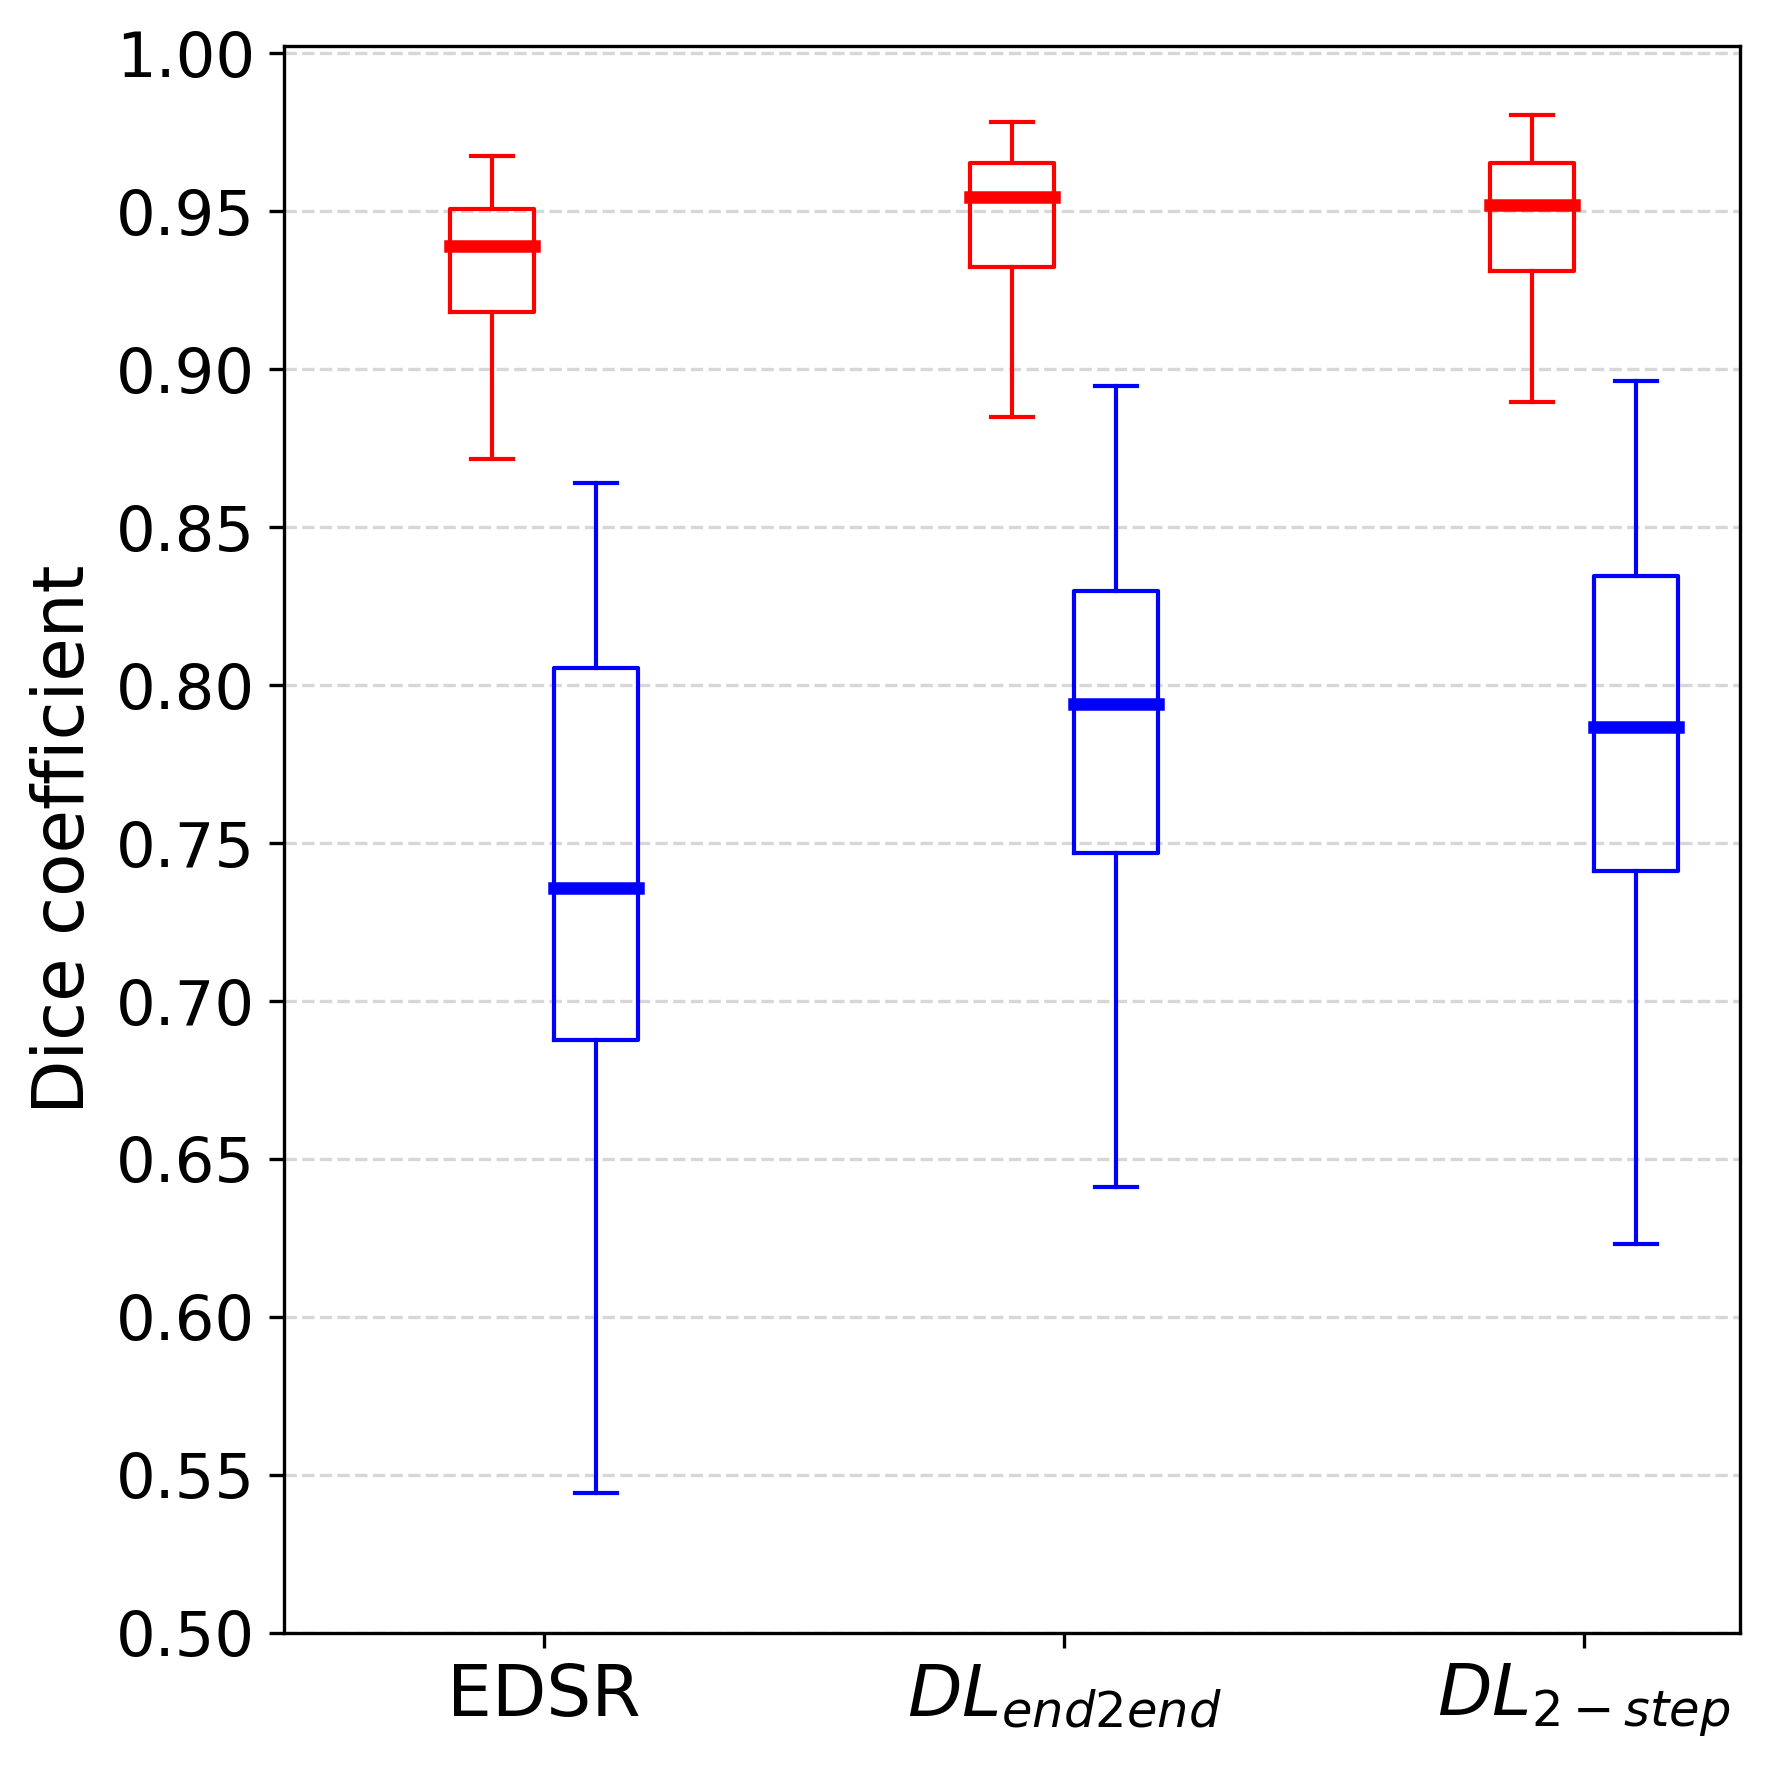

In [63]:
motion_lv = motion_data['lv_dice'] 
motion_myo = motion_data['myo_dice'] 
twostep_lv = twostep_data['lv_dice']
twostep_myo = twostep_data['myo_dice'] 
end2end_lv = end2end_data['lv_dice'] 
end2end_myo = end2end_data['myo_dice']

print(np.median(motion_lv), np.quantile(motion_lv,0.25), np.quantile(motion_lv,0.75))
print(np.median(motion_myo), np.quantile(motion_myo,0.25), np.quantile(motion_myo,0.75))
print(np.median(twostep_lv), np.quantile(twostep_lv,0.25), np.quantile(twostep_lv,0.75))
print(np.median(twostep_myo), np.quantile(twostep_myo,0.25), np.quantile(twostep_myo,0.75))
print(np.median(end2end_lv), np.quantile(end2end_lv,0.25), np.quantile(end2end_lv,0.75))
print(np.median(end2end_myo), np.quantile(end2end_myo,0.25), np.quantile(end2end_myo,0.75))


save_path = os.path.join(main_path,'pictures/manuscript/box_plot_SunnyBrook_Dice.eps')

# font2 is typically used for legend
data_lv = [motion_lv,  twostep_lv, end2end_lv]
data_myo = [motion_myo, twostep_myo, end2end_myo]

ticks = ['EDSR', '$DL_{end2end}$','$DL_{2-step}$']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=3)

plt.figure(figsize= (6,6), dpi = 300)

bp_lv = plt.boxplot(data_lv, positions=[1.0,3.5, 6.0], sym='', widths=0.4)
bp_myo = plt.boxplot(data_myo, positions=[1.5, 4.0, 6.5], sym='', widths=0.4)

set_box_color(bp_lv, 'red') # colors are from http://colorbrewer2.org/
set_box_color(bp_myo, 'blue')


plt.xticks([1.25, 3.75, 6.25], ticks,fontsize = 17)
plt.xlim(-0, 7.0)
# plt.yticks(np.arange(1,5.01,step = 0.4),fontsize=15)
plt.yticks(np.arange(0.50,1.01,step = 0.05),fontsize=15)
plt.grid(True, linestyle='dashed', alpha=0.5, axis = 'y')
plt.ylabel("Dice coefficient",fontsize=17)
plt.tight_layout()

# save
plt.savefig(save_path, format='eps')

In [23]:
# MICCAI
# file
ours = pd.read_excel(main_path + '/predict/Combined/Iteration_C/comparison_centers_test_complete_across_slices_IterationC_collection.xlsx').iloc[0:2280]
lax = pd.read_excel(main_path + '/other_results/comparison_centers_LAX_registration_method.xlsx').iloc[0:1130]


motion = ours['error_motion_mean']
first_step = ours['error_pred_step1_mean']
third_step = ours['error_pred_step3_mean'] + 0.05
lax = lax['error_LAX_mean']

print(np.median(third_step), np.quantile(third_step,0.25), np.quantile(third_step,0.75))

1.161 0.7375 1.7892500000000002


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


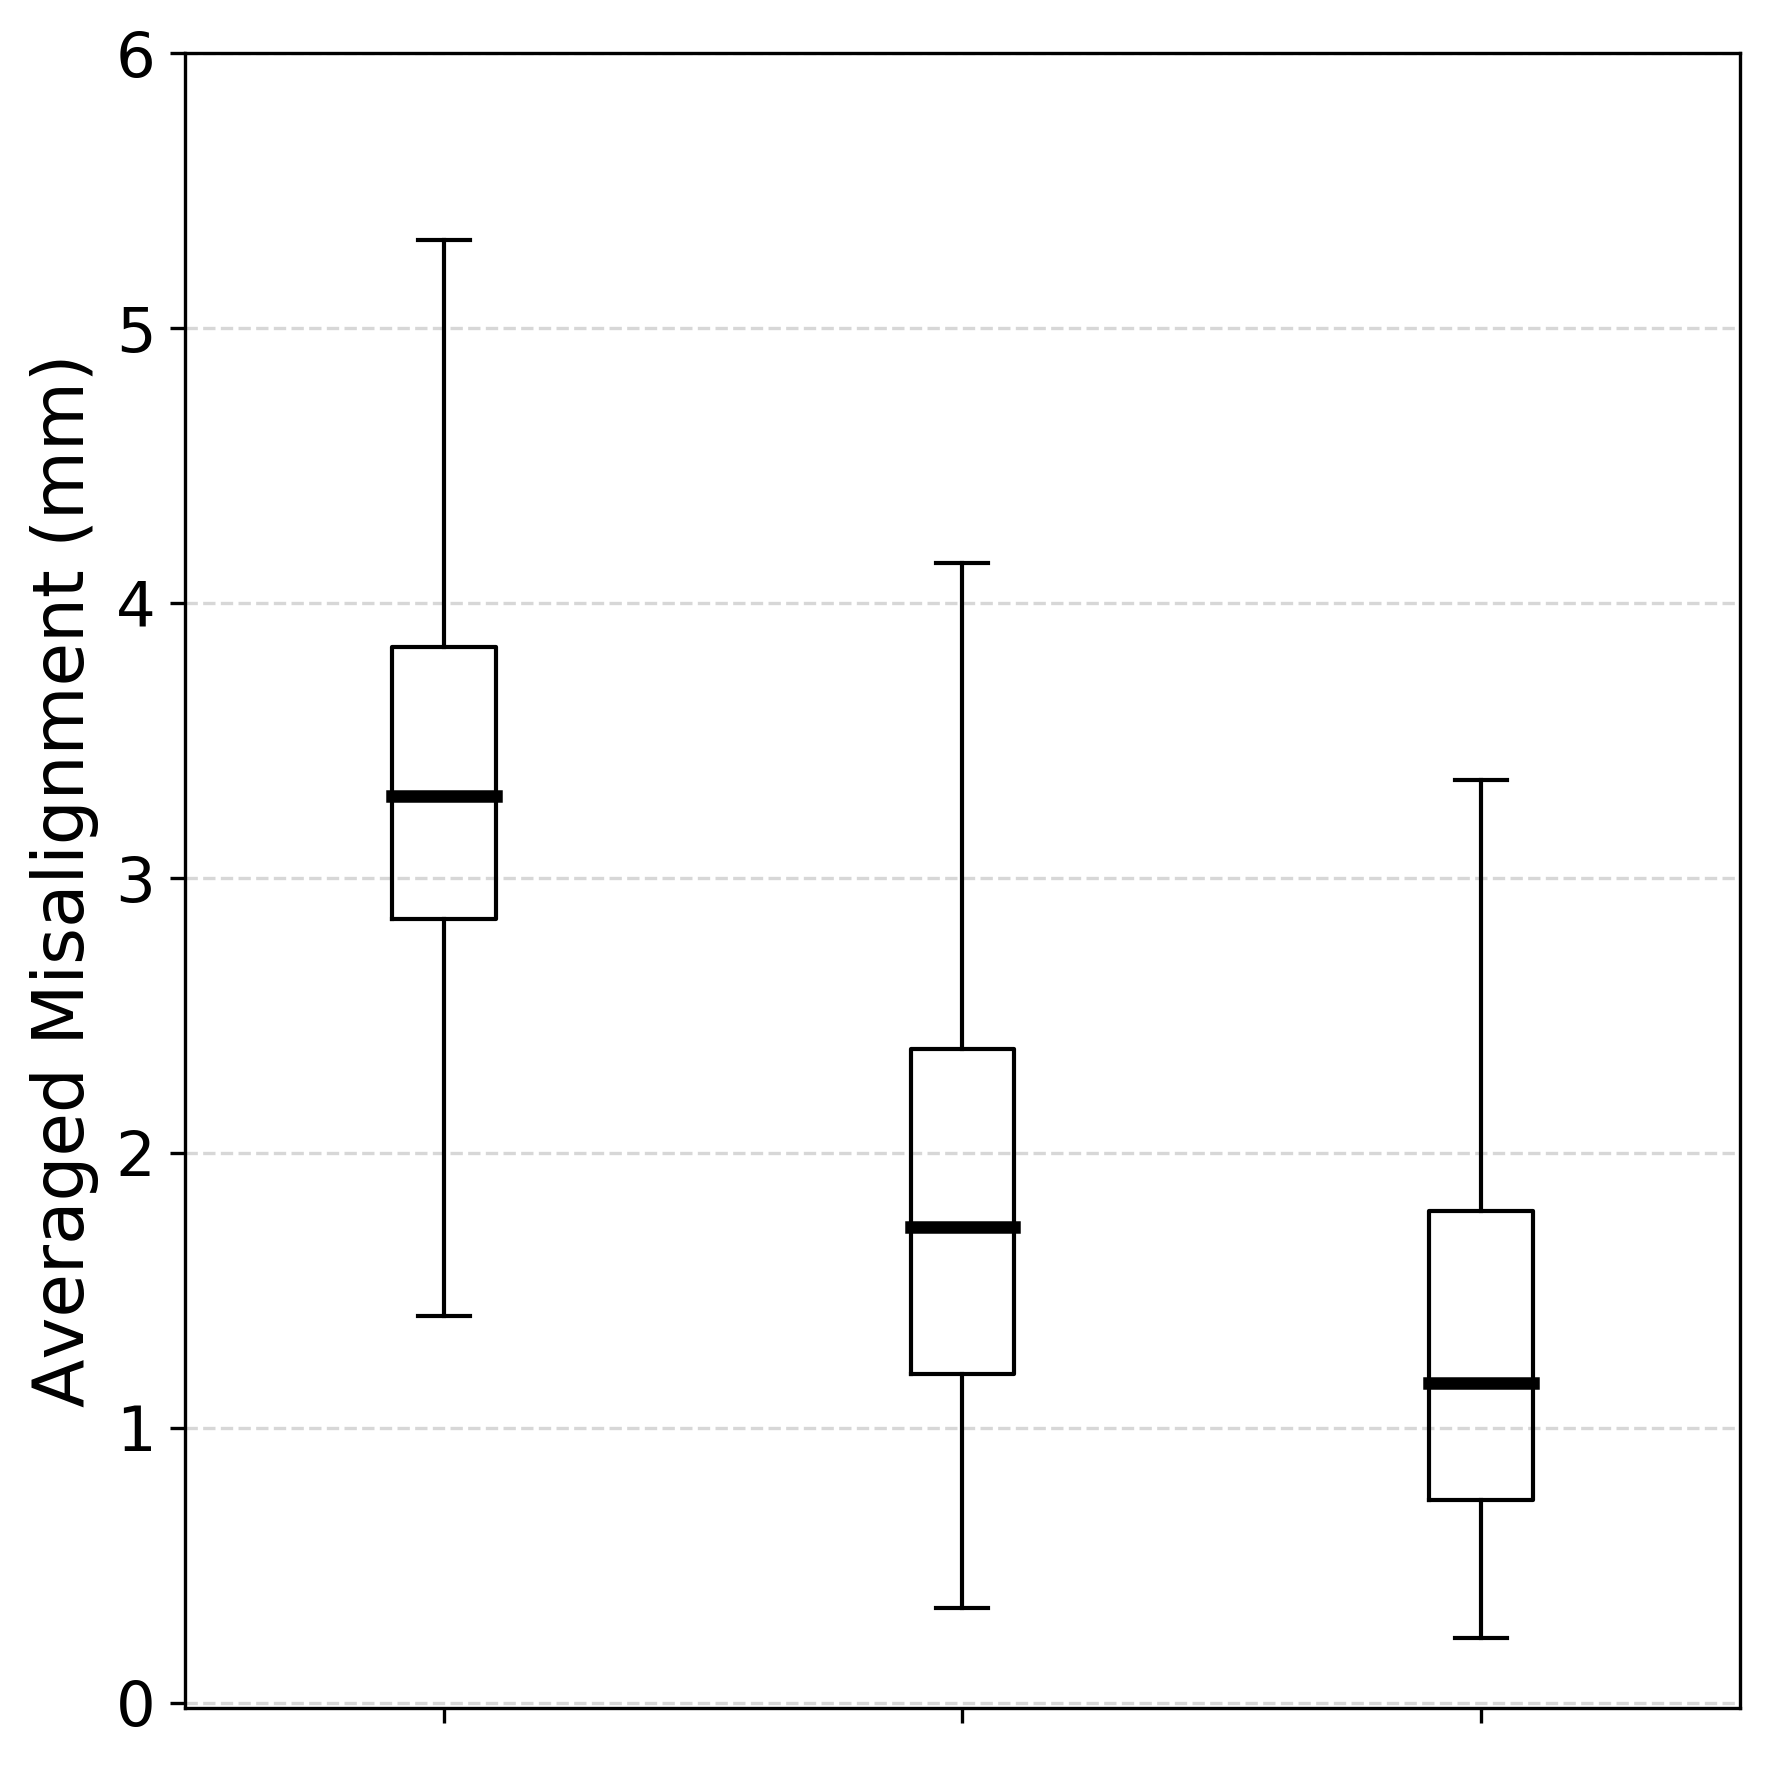

In [19]:
save_path = os.path.join(main_path,'pictures/manuscript/box_plot_motion_misalignment-MICCAI.eps')

# font2 is typically used for legend
data_all = [motion, first_step, third_step]

ticks = ['','','','']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=3)

plt.figure(figsize= (6,6), dpi = 300)

bp_all = plt.boxplot(data_all, positions=[1.0,3.0, 5.0], sym='', widths=0.4)

set_box_color(bp_all, 'black') # colors are from http://colorbrewer2.org/


plt.xticks([1.0,3.0, 5.00], ticks,fontsize = 17)
plt.xlim(-0, 6.0)
plt.yticks(np.arange(0.,6.01,step = 1),fontsize=15)
plt.grid(True, linestyle='dashed', alpha=0.5, axis = 'y')
plt.ylabel("Averaged Misalignment (mm)",fontsize=17)
plt.tight_layout()

# save
plt.savefig(save_path, format='eps')